In [1]:
from matplotlib import cm 
import gzip
import matplotlib.pyplot as plt
import csv
import numpy as np 
import glob 
import json
import os
import pandas as pd
import seaborn as sns
#import infosys.utils as utils 
from collections import defaultdict
cmap = cm.get_cmap('inferno', 10)
import random
from scipy.stats import sem


In [5]:
# load all data and arrange in dataframe

### RUN THIS LATER:

In [173]:
result_dir = 'results/01122022_friction_vary_friction_and_learning_and_trunc_3_runs'


In [68]:
verbose_dir = 'verbose/07122022_friction_vary_friction_and_learning_and_trunc_1_runs'#07122022_friction_vary_friction_and_learning_and_trunc_1_runs'


In [174]:
# look at single results file
data = json.load(open(os.path.join(result_dir,'mu_fr_0.1-learn_fr_0.2-trunc_0.json')))
df = pd.DataFrame.from_dict(data, orient='columns')
df

,mu_friction,learning_friction,truncation_interval,targeting_criterion,beta,gamma,trackmeme,verbose,epsilon,mu,...,alpha,theta,pass_friction,human_network,check_conv,graph_gml,mode,quality,diversity,discriminative_pow
0,0.1,0.2,0,None,0,0,True,False,0.0001,0.5,...,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,True,data/infosys_network.gml,igraph,0.384002,4.915777,"[0.022420245857121466, 3.343998340607893e-14]"
1,0.1,0.2,0,None,0,0,True,False,0.0001,0.5,...,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,True,data/infosys_network.gml,igraph,0.406813,4.681287,"[0.031056791415472695, 4.010870801248369e-40]"
2,0.1,0.2,0,None,0,0,True,False,0.0001,0.5,...,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,True,data/infosys_network.gml,igraph,0.314020,4.722561,"[0.029783572797990623, 4.635361013793766e-28]"


In [175]:
filenames = glob.glob(os.path.join(result_dir,'*json*')) 
len(filenames)

57

In [176]:
dfs = [] # an empty list to store the data frames
for file in filenames:
    data = pd.read_json(file, orient='columns') # read data frame from json file
    dfs.append(data) # append the data frame to the list

temp = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

In [177]:
temp.head()
#data = pd.read_json('results/25102022_friction_vary_friction_and_learning_2_runs/mu_fr_0.025-learn_fr_0.03.json', orient='columns')

,mu_friction,learning_friction,truncation_interval,targeting_criterion,beta,gamma,trackmeme,verbose,epsilon,mu,...,alpha,theta,pass_friction,human_network,check_conv,graph_gml,mode,quality,diversity,discriminative_pow
0,0.5,0.2,0,NaN,0,0,True,False,0.0001,0.5,...,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,True,data/infosys_network.gml,igraph,0.316140,5.600556,"[0.028166675580729002, 2.149121473286424e-35]"
1,0.5,0.2,0,NaN,0,0,True,False,0.0001,0.5,...,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,True,data/infosys_network.gml,igraph,0.335564,5.170419,"[0.02931850457902, 1.232902183498976e-70]"
2,0.5,0.2,0,NaN,0,0,True,False,0.0001,0.5,...,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,True,data/infosys_network.gml,igraph,0.361656,5.307874,"[0.030107388092642004, 1.1812442116742198e-24]"
3,0.5,0.5,0,NaN,0,0,True,False,0.0001,0.5,...,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,True,data/infosys_network.gml,igraph,0.347113,5.342485,"[0.060465053009838, 3.493059770115795e-62]"
4,0.5,0.5,0,NaN,0,0,True,False,0.0001,0.5,...,15,1,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,True,data/infosys_network.gml,igraph,0.391732,5.462124,"[0.06586741486414101, 2.2639197854113808e-95]"


In [178]:
# make discriminative_pow column two columns
temp[['dicriminative_pow_tau','dicriminative_pow_pval']] = pd.DataFrame(temp.discriminative_pow.tolist(), index= temp.index)

In [179]:
temp.head()

,mu_friction,learning_friction,truncation_interval,targeting_criterion,beta,gamma,trackmeme,verbose,epsilon,mu,...,pass_friction,human_network,check_conv,graph_gml,mode,quality,diversity,discriminative_pow,dicriminative_pow_tau,dicriminative_pow_pval
0,0.5,0.2,0,NaN,0,0,True,False,0.0001,0.5,...,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,True,data/infosys_network.gml,igraph,0.316140,5.600556,"[0.028166675580729002, 2.149121473286424e-35]",0.028167,2.149121e-35
1,0.5,0.2,0,NaN,0,0,True,False,0.0001,0.5,...,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,True,data/infosys_network.gml,igraph,0.335564,5.170419,"[0.02931850457902, 1.232902183498976e-70]",0.029319,1.232902e-70
2,0.5,0.2,0,NaN,0,0,True,False,0.0001,0.5,...,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,True,data/infosys_network.gml,igraph,0.361656,5.307874,"[0.030107388092642004, 1.1812442116742198e-24]",0.030107,1.181244e-24
3,0.5,0.5,0,NaN,0,0,True,False,0.0001,0.5,...,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,True,data/infosys_network.gml,igraph,0.347113,5.342485,"[0.060465053009838, 3.493059770115795e-62]",0.060465,3.493060e-62
4,0.5,0.5,0,NaN,0,0,True,False,0.0001,0.5,...,0,Amended_BA_Friction_m=3_n=1000_coeff=.29.gml,True,data/infosys_network.gml,igraph,0.391732,5.462124,"[0.06586741486414101, 2.2639197854113808e-95]",0.065867,2.263920e-95


In [128]:
# Make quality table
qual_agg = temp.groupby(['mu_friction', 'learning_friction','truncation_interval'])['quality'].agg(['mean', 'sem']).reset_index()
# this makes hierarchical index qual_agg_2 = temp.groupby(['mu_friction', 'learning_friction'])['quality'].agg(['mean', 'std'])

In [129]:
qual_agg.head()

,mu_friction,learning_friction,truncation_interval,mean,sem
0,0.00,0.00,0.0,0.318904,0.008930
1,0.00,0.00,0.1,0.430148,0.009082
2,0.01,0.00,0.0,0.315364,0.023071
3,0.01,0.00,0.1,0.465312,0.035764
4,0.01,0.01,0.0,0.336131,0.027008


In [130]:
# Make diversity table
div_agg = temp.groupby(['mu_friction', 'learning_friction','truncation_interval'])['diversity'].agg(['mean', 'sem']).reset_index()

In [180]:
# Make disrcriminative power table
dp_agg = temp.groupby(['mu_friction', 'learning_friction','truncation_interval'])['dicriminative_pow_tau'].agg(['mean', 'sem']).reset_index()


In [181]:
dp_agg_pval = temp.groupby(['mu_friction', 'learning_friction','truncation_interval'])['dicriminative_pow_pval'].agg(['mean', 'sem']).reset_index()

In [149]:
def frictionplot(no_learn, learn_1, learn_10, learn_50, learn_100, ylabel, savename, title):
    fig, ax = plt.subplots()
    clrs = sns.color_palette("husl", 10)
    with sns.axes_style("darkgrid"):

        meanst = no_learn['mean']
        sdt = no_learn['sem']
    
        meanst_learn_10 = learn_10['mean']
        sdt_learn_10 = learn_10['sem']
        
        meanst_learn_1 = learn_1['mean']
        sdt_learn_1 = learn_1['sem']
        
        meanst_learn_50 = learn_50['mean']
        sdt_learn_50 = learn_50['sem']

        meanst_learn_100 = learn_100['mean']
        sdt_learn_100 = learn_100['sem']
    
        ax.plot(pd.unique(no_learn['mu_friction']), meanst,label = 'No Learning', c=clrs[7], linestyle='-')
        ax.fill_between(pd.unique(no_learn['mu_friction']), meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[7])
    
        ax.plot(pd.unique(learn_1['mu_friction']), meanst_learn_1,  label = 'Learning, 1%',c=clrs[1], linestyle='dashdot')
        ax.fill_between(pd.unique(learn_1['mu_friction']), meanst_learn_1-sdt_learn_1, meanst_learn_1+sdt_learn_1 ,alpha=0.3, facecolor=clrs[1])
    
        ax.plot(pd.unique(learn_10['mu_friction']), meanst_learn_10,  label = 'Learning, 10%',c=clrs[0], linestyle='--')
        ax.fill_between(pd.unique(learn_10['mu_friction']), meanst_learn_10-sdt_learn_10, meanst_learn_10+sdt_learn_10 ,alpha=0.3, facecolor=clrs[0])
   
        ax.plot(pd.unique(learn_50['mu_friction']), meanst_learn_50,  label = 'Learning, 50%',c=clrs[3], linestyle='dotted')
        ax.fill_between(pd.unique(learn_50['mu_friction']), meanst_learn_50-sdt_learn_50, meanst_learn_50+sdt_learn_50 ,alpha=0.3, facecolor=clrs[3])

        ax.plot(pd.unique(learn_100['mu_friction']), meanst_learn_100,  label = 'Learning, 100%',c=clrs[8], dashes=[3,6,3,6,3,18])
        ax.fill_between(pd.unique(learn_100['mu_friction']), meanst_learn_100-sdt_learn_100, meanst_learn_100+sdt_learn_100 ,alpha=0.3, facecolor=clrs[8])

        #ax.set_xlim([0, .5])

        ax.legend()
        #ax.set_yscale('log')
        plt.xlabel("Friction")
        fig.set_tight_layout(True)
        plt.ylabel(ylabel)
        ax.set_title(title)

        plt.savefig(savename)  

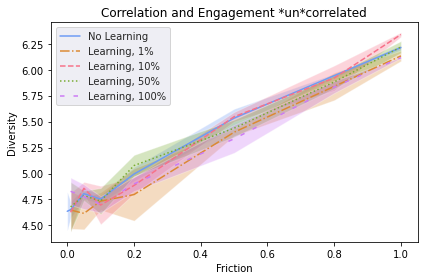

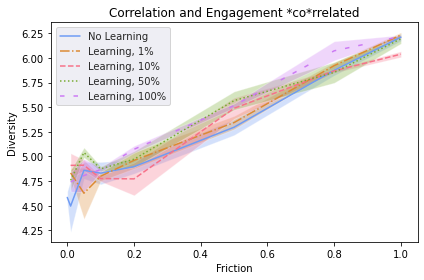

In [150]:
no_learn = div_agg.loc[(div_agg['learning_friction'] == 0.0)  & (div_agg['truncation_interval'] == 0)] 
learn_10 = div_agg.loc[(div_agg['learning_friction'] > 0.098) & (div_agg['learning_friction'] < 0.13) & (div_agg['truncation_interval'] == 0)]
learn_1 = div_agg.loc[(div_agg['learning_friction'] > 0.009) & (div_agg['learning_friction'] < 0.013) & (div_agg['truncation_interval'] == 0) ]
learn_50 = div_agg.loc[(div_agg['learning_friction'] > 0.49) & (div_agg['learning_friction'] < 0.55) & (div_agg['truncation_interval'] == 0)]
learn_100 = div_agg.loc[(div_agg['learning_friction'] > 0.98) & (div_agg['truncation_interval'] == 0)]
ylabel = 'Diversity'
savename = 'line_plot_diversity_and_learning_no_truncation.pdf'
title = 'Correlation and Engagement *un*correlated'
frictionplot(no_learn, learn_1, learn_10, learn_50, learn_100, ylabel, savename, title)

no_learn = div_agg.loc[(div_agg['learning_friction'] == 0.0)  & (div_agg['truncation_interval'] == 0.1)] 
learn_10 = div_agg.loc[(div_agg['learning_friction'] > 0.098) & (div_agg['learning_friction'] < 0.13) & (div_agg['truncation_interval'] == 0.1)]
learn_1 = div_agg.loc[(div_agg['learning_friction'] > 0.009) & (div_agg['learning_friction'] < 0.013) & (div_agg['truncation_interval'] == 0.1) ]
learn_50 = div_agg.loc[(div_agg['learning_friction'] > 0.49) & (div_agg['learning_friction'] < 0.55) & (div_agg['truncation_interval'] == 0.1)]
learn_100 = div_agg.loc[(div_agg['learning_friction'] > 0.98) & (div_agg['truncation_interval'] == 0.1)]
ylabel = 'Diversity'
savename = 'line_plot_diversity_and_learning_truncation.pdf'
title = 'Correlation and Engagement *co*rrelated'
frictionplot(no_learn, learn_1, learn_10, learn_50, learn_100, ylabel, savename, title)


### RUN THIS LATER:

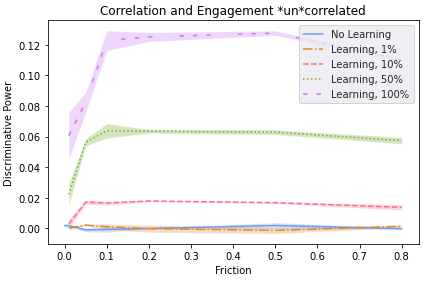

In [182]:
no_learn = dp_agg.loc[(dp_agg['learning_friction'] == 0.0)  & (dp_agg['truncation_interval'] == 0)] 
learn_10 = dp_agg.loc[(dp_agg['learning_friction'] > 0.098) & (dp_agg['learning_friction'] < 0.13)  & (dp_agg['truncation_interval'] == 0)]
learn_1 = dp_agg.loc[(dp_agg['learning_friction'] > 0.009) & (dp_agg['learning_friction'] < 0.013)  & (dp_agg['truncation_interval'] == 0)]
learn_50 = dp_agg.loc[(dp_agg['learning_friction'] > 0.49) & (dp_agg['learning_friction'] < 0.55)  & (dp_agg['truncation_interval'] == 0)]
learn_100 = dp_agg.loc[(dp_agg['learning_friction'] > 0.98)  & (dp_agg['truncation_interval'] == 0)]

ylabel = 'Discriminative Power'
savename = 'line_plot_discriminativepower_and_learning_no_truncation.pdf'
title = 'Correlation and Engagement *un*correlated'
frictionplot(no_learn, learn_1, learn_10, learn_50, learn_100, ylabel, savename, title)



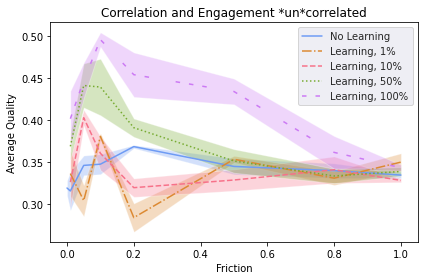

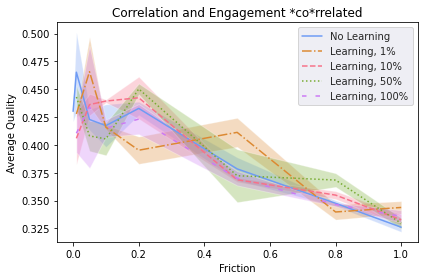

In [151]:
no_learn = qual_agg.loc[(qual_agg['learning_friction'] == 0.0)  & (qual_agg['truncation_interval'] == 0)] 
learn_10 = qual_agg.loc[(qual_agg['learning_friction'] > 0.098) & (qual_agg['learning_friction'] < 0.13)  & (qual_agg['truncation_interval'] == 0)]
learn_1 = qual_agg.loc[(qual_agg['learning_friction'] > 0.009) & (qual_agg['learning_friction'] < 0.013)  & (qual_agg['truncation_interval'] == 0)]
learn_50 = qual_agg.loc[(qual_agg['learning_friction'] > 0.49) & (qual_agg['learning_friction'] < 0.55)  & (qual_agg['truncation_interval'] == 0)]
learn_100 = qual_agg.loc[(qual_agg['learning_friction'] > 0.98)  & (qual_agg['truncation_interval'] == 0)]

ylabel = 'Average Quality'
savename = 'line_plot_quality_and_learning_no_truncation.pdf'
title = 'Correlation and Engagement *un*correlated'

frictionplot(no_learn, learn_1, learn_10, learn_50, learn_100, ylabel, savename, title)

no_learn = qual_agg.loc[(qual_agg['learning_friction'] == 0.0)  & (qual_agg['truncation_interval'] == 0.1)] 
learn_10 = qual_agg.loc[(qual_agg['learning_friction'] > 0.098) & (qual_agg['learning_friction'] < 0.13)  & (qual_agg['truncation_interval'] == 0.1)]
learn_1 = qual_agg.loc[(qual_agg['learning_friction'] > 0.009) & (qual_agg['learning_friction'] < 0.013)  & (qual_agg['truncation_interval'] == 0.1)]
learn_50 = qual_agg.loc[(qual_agg['learning_friction'] > 0.49) & (qual_agg['learning_friction'] < 0.55)  & (qual_agg['truncation_interval'] == 0.1)]
learn_100 = qual_agg.loc[(qual_agg['learning_friction'] > 0.98)  & (qual_agg['truncation_interval'] == 0.1)]

ylabel = 'Average Quality'
savename = 'line_plot_quality_and_learning_truncation.pdf'
title = 'Correlation and Engagement *co*rrelated'

frictionplot(no_learn, learn_1, learn_10, learn_50, learn_100, ylabel, savename, title)


### Quality convergence

In [69]:
fric_00 = os.path.join(verbose_dir, 'mu_fr_0.0-learn_fr_0.0-trunc_0.json.gz')
fric_01 = os.path.join(verbose_dir, 'mu_fr_0.01-learn_fr_0-trunc_0.json.gz')
fric_10 = os.path.join(verbose_dir, 'mu_fr_0.1-learn_fr_0-trunc_0.json.gz')
fric_50 = os.path.join(verbose_dir, 'mu_fr_0.5-learn_fr_0-trunc_0.json.gz')
fric_100 = os.path.join(verbose_dir, 'mu_fr_1-learn_fr_0-trunc_0.json.gz')

fric_10_learn_01 = os.path.join(verbose_dir, 'mu_fr_0.1-learn_fr_0.01-trunc_0.json.gz')
fric_10_learn_10 = os.path.join(verbose_dir, 'mu_fr_0.1-learn_fr_0.1-trunc_0.json.gz')
fric_10_learn_50 = os.path.join(verbose_dir, 'mu_fr_0.1-learn_fr_0-trunc_0.json.gz')
fric_10_learn_100 = os.path.join(verbose_dir, 'mu_fr_0.1-learn_fr_1-trunc_0.json.gz')

fric_00_trunc_01 = os.path.join(verbose_dir, 'mu_fr_0.0-learn_fr_0.0-trunc_0.1.json.gz')
fric_01_trunc_01 = os.path.join(verbose_dir, 'mu_fr_0.01-learn_fr_0-trunc_0.1.json.gz')
fric_10_trunc_01 = os.path.join(verbose_dir, 'mu_fr_0.1-learn_fr_0-trunc_0.1.json.gz')
fric_50_trunc_01 = os.path.join(verbose_dir, 'mu_fr_0.5-learn_fr_0-trunc_0.1.json.gz')


In [56]:
test = os.path.join(verbose_dir, 'mu_fr_0.05-learn_fr_0.05-trunc_0.json.gz')

In [57]:
# inspect data keys
with gzip.open(test, 'r') as fin:        # 4. gzip
    json_bytes = fin.read()                      # 3. bytes (i.e. UTF-8)

json_str = json_bytes.decode('utf-8')            # 2. string (i.e. JSON)
data = json.loads(json_str)                      # 1. data

data.keys()

dict_keys(['mu_friction', 'learning_friction', 'truncation_interval', 'targeting_criterion', 'beta', 'gamma', 'trackmeme', 'verbose', 'epsilon', 'mu', 'phi', 'alpha', 'theta', 'pass_friction', 'human_network', 'check_conv', 'graph_gml', 'mode', 'quality', 'diversity', 'discriminative_pow', 'quality_timestep', 'all_memes', 'all_feeds', 'meme_influx', 'meme_netchange'])

In [59]:
 data # inspect data in editor 

{'mu_friction': 0.05,
 'learning_friction': 0.05,
 'truncation_interval': 0,
 'targeting_criterion': None,
 'beta': 0,
 'gamma': 0,
 'trackmeme': True,
 'verbose': False,
 'epsilon': 0.0001,
 'mu': 0.5,
 'phi': 1,
 'alpha': 15,
 'theta': 1,
 'pass_friction': 0,
 'human_network': 'Amended_BA_Friction_m=3_n=1000_coeff=.29.gml',
 'check_conv': True,
 'graph_gml': 'data/infosys_network.gml',
 'mode': 'igraph',
 'quality': [0.31484521863240145, 0.3052321197237146, 0.3253782083843778],
 'diversity': [4.981169039640859, 4.56823761986257, 4.719636928322277],
 'discriminative_pow': [[0.007114977097387695, 0.018452194192791198],
  [0.007361182453044198, 0.0006053913272471957],
  [0.008644395206206846, 8.769837443861044e-06]],
 'quality_timestep': [[1,
   0.8611372355732851,
   0.7516197825289627,
   0.6630400822866102,
   0.5936379212322518,
   0.5370878330225193,
   0.49157177707831806,
   0.45642453056763677,
   0.4309344726840598,
   0.41666929061547664,
   0.406305314178532,
   0.40711402322

In [81]:
def qualityplot_both(qual_smoothened, qual_average, legendtext, filename):
    fig, ax = plt.subplots()
    #clrs = sns.color_palette("husl", 10)
    with sns.axes_style("darkgrid"):
        for x in range(0, len(qual_smoothened)):
            ax.plot(list(range(0,len(qual_smoothened[x]),1)), qual_smoothened[x],label = 'Smoothened average')#, c=clrs[7], linestyle='-')
            ax.plot(list(range(0,len(qual_average[x]),1)), qual_average[x],label = 'Average', linestyle = '--')#, c=clrs[7], linestyle='-')

            # ax.set_yscale('log')
            plt.xlabel("Timestep")
            fig.set_tight_layout(True)
            plt.ylabel("Quality")
    ax.set_title(legendtext)
    plt.savefig(filename)  
    plt.show()

   


In [80]:
range(0, len(qual))

range(0, 2)

In [51]:
def qualityplot(qual, legendtext, filename):
    fig, ax = plt.subplots()
    #clrs = sns.color_palette("husl", 10)
    with sns.axes_style("darkgrid"):
        for x in range(0, len(qual)):
            ax.plot(list(range(0,len(qual[x]),1)), qual[x])#,label = legendtext)#, c=clrs[7], linestyle='-')
            # ax.set_yscale('log')
            plt.xlabel("Timestep")
            fig.set_tight_layout(True)
            plt.ylabel("Quality")
    ax.set_title(legendtext)
    plt.savefig(filename)  
    plt.show()

In [53]:
def getgzip(file):
    with gzip.open(file, 'r') as fin:        # 4. gzip
        json_bytes = fin.read()                      # 3. bytes (i.e. UTF-8)

        json_str = json_bytes.decode('utf-8')            # 2. string (i.e. JSON)
        data = json.loads(json_str)                      # 1. data
        qual = data['quality_timestep']

    return(qual)

In [72]:
def getgzip_both(file):
    with gzip.open(file, 'r') as fin:        # 4. gzip
        json_bytes = fin.read()                      # 3. bytes (i.e. UTF-8)

        json_str = json_bytes.decode('utf-8')            # 2. string (i.e. JSON)
        data = json.loads(json_str)                      # 1. data
        qual_smoothened = data['quality_timestep_smoothened']
        qual_average = data['quality_timestep_average']

    return(qual_smoothened, qual_average)


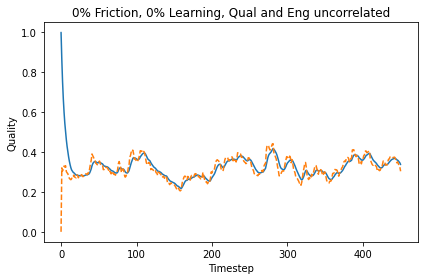

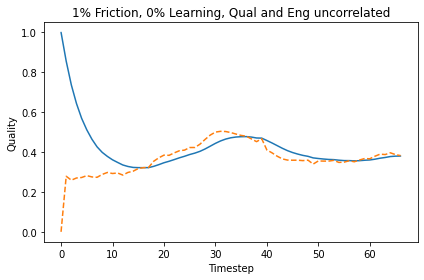

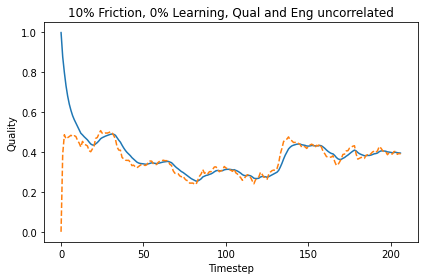

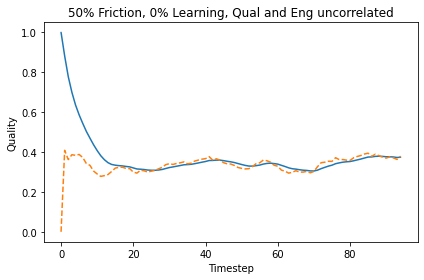

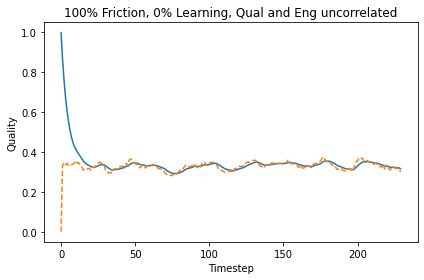

In [85]:
qual_smoothened, qual_average = getgzip_both(fric_00)
qualityplot_both(qual_smoothened, qual_average, '0% Friction, 0% Learning, Qual and Eng uncorrelated', 'quality_convergence_nofric.pdf')
qual_smoothened, qual_average = getgzip_both(fric_01)
qualityplot_both(qual_smoothened, qual_average, '1% Friction, 0% Learning, Qual and Eng uncorrelated', 'quality_convergence_fric01.pdf')
qual_smoothened, qual_average = getgzip_both(fric_10)
qualityplot_both(qual_smoothened, qual_average, '10% Friction, 0% Learning, Qual and Eng uncorrelated', 'quality_convergence_fric10.pdf')
qual_smoothened, qual_average = getgzip_both(fric_50)
qualityplot_both(qual_smoothened, qual_average, '50% Friction, 0% Learning, Qual and Eng uncorrelated', 'quality_convergence_fric50.pdf')
qual_smoothened, qual_average = getgzip_both(fric_100)
qualityplot_both(qual_smoothened, qual_average, '100% Friction, 0% Learning, Qual and Eng uncorrelated', 'quality_convergence_fric100.pdf')

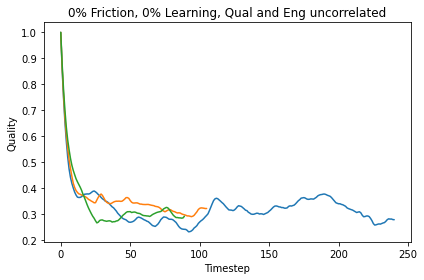

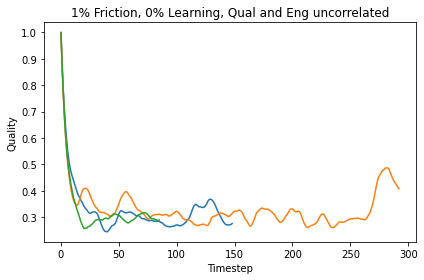

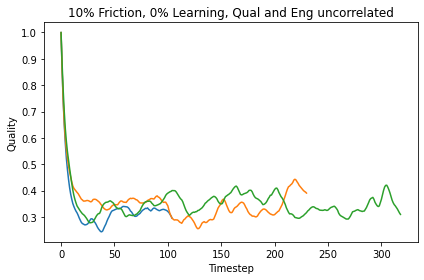

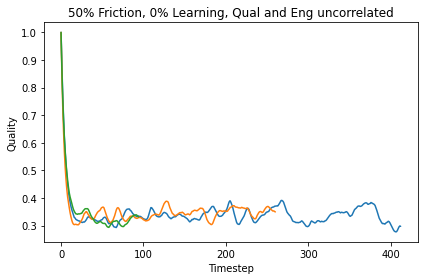

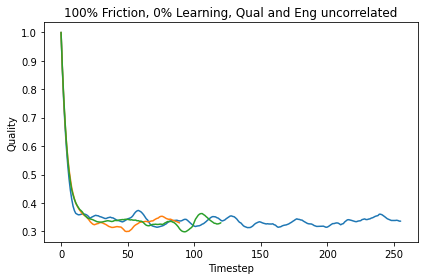

In [58]:
qual = getgzip(fric_00)
qualityplot(qual, '0% Friction, 0% Learning, Qual and Eng uncorrelated', 'quality_convergence_nofric.pdf')
qual = getgzip(fric_01)
qualityplot(qual, '1% Friction, 0% Learning, Qual and Eng uncorrelated', 'quality_convergence_fric01.pdf')
qual = getgzip(fric_10)
qualityplot(qual, '10% Friction, 0% Learning, Qual and Eng uncorrelated', 'quality_convergence_fric10.pdf')
qual = getgzip(fric_50)
qualityplot(qual, '50% Friction, 0% Learning, Qual and Eng uncorrelated', 'quality_convergence_fric50.pdf')
qual = getgzip(fric_100)
qualityplot(qual, '100% Friction, 0% Learning, Qual and Eng uncorrelated', 'quality_convergence_fric100.pdf')

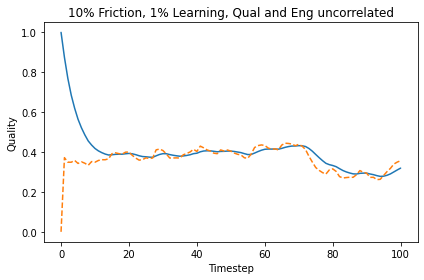

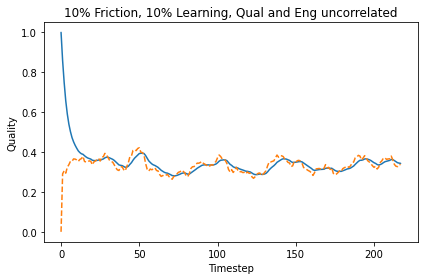

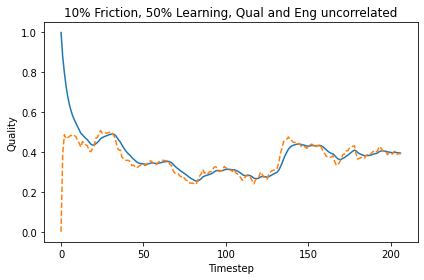

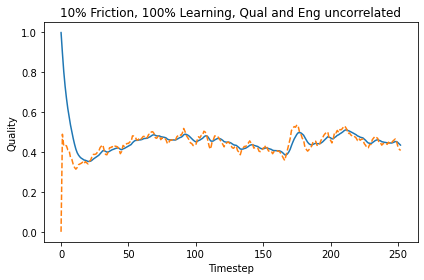

In [88]:
qual_smoothened, qual_average = getgzip_both(fric_10_learn_01)
qualityplot_both(qual_smoothened, qual_average, '10% Friction, 1% Learning, Qual and Eng uncorrelated', 'quality_convergence_fric10_learn1.pdf')
qual_smoothened, qual_average = getgzip_both(fric_10_learn_10)
qualityplot_both(qual_smoothened, qual_average, '10% Friction, 10% Learning, Qual and Eng uncorrelated', 'quality_convergence_fric10_learn10.pdf')
qual_smoothened, qual_average = getgzip_both(fric_10_learn_50)
qualityplot_both(qual_smoothened, qual_average, '10% Friction, 50% Learning, Qual and Eng uncorrelated', 'quality_convergence_fric10_learn50.pdf')
qual_smoothened, qual_average = getgzip_both(fric_10_learn_100)
qualityplot_both(qual_smoothened, qual_average, '10% Friction, 100% Learning, Qual and Eng uncorrelated', 'quality_convergence_fric10_learn100.pdf')

In [1]:
qual = getgzip(fric_00_trunc_01)
qualityplot(qual, '0% Friction, 0% Learning, Qual and Eng correlated', 'quality_convergence_nofric_trunc01.pdf')
qual = getgzip(fric_01_trunc_01)
qualityplot(qual, '1% Friction, 0% Learning, Qual and Eng correlated', 'quality_convergence_fric01_trunc_01.pdf')
qual = getgzip(fric_10_trunc_01)
qualityplot(qual, '10% Friction, 0% Learning, Qual and Eng correlated', 'quality_convergence_fric10_trunc01.pdf')
qual = getgzip(fric_50_trunc_01)
qualityplot(qual, '50% Friction, 0% Learning, Qual and Eng correlated', 'quality_convergence_fric50_trunc01.pdf')
qual = getgzip(fric_100_trunc_01)
qualityplot(qual, '100% Friction, 0% Learning, Qual and Eng correlated', 'quality_convergence_fric100_trunc01.pdf')

NameError: name 'getgzip' is not defined

Notes regarding the Kendall-Tau measure

In [ ]:
import scipy.stats as stats

In [ ]:
def measure_kendall_tau(self):
        # calculate discriminative power of system
        # Call only after self._return_all_meme_info() is called

        # The below does not account for ties:

        quality_ranked = sorted(self.meme_dict, key=lambda m: m['quality'])
        for ith, elem in enumerate(quality_ranked):
            elem.update({'qual_th':ith})

        share_ranked = sorted(quality_ranked, key=lambda m: m['human_shares'])
        for ith, elem in enumerate(share_ranked):
            elem.update({'share_th':ith})

        idx_ranked = sorted(share_ranked, key=lambda m: m['id'])
        ranking1 = [meme['qual_th'] for meme in idx_ranked] # Laura: position returned to ranking1
        ranking2 = [meme['share_th'] for meme in idx_ranked]
        
        tau, p_value = utils.kendall_tau(ranking1, ranking2)
        return tau, p_value

In [126]:
meme_dict = [{'id': 1, 'quality': '0.9', 'human_shares': 10}, {'id': 2, 'quality': '0.7', 'human_shares': 15}, {'id': 3, 'quality': '0.4', 'human_shares': 100}]

In [160]:
def measure_kendall_tau(meme_dict):
    # calculate discriminative power of system
    # Call only after self._return_all_meme_info() is called
    # Laura: newly written function to account for ties when producing ranking1 and ranking2
    qualities = [meme['quality'] for meme in meme_dict]
    unique_qualities = set(qualities) 

    ranks = {key: rank for rank, key in enumerate(sorted(unique_qualities, reverse=True), 1)}

    for meme in meme_dict:
        meme_quality = meme['quality']
        qual_th = ranks[meme_quality]
        meme.update({'qual_th':qual_th})


    shares = [meme['human_shares'] for meme in meme_dict]
    unique_shares = set(shares)

    ranks = {key: rank for rank, key in enumerate(sorted(unique_shares, reverse=True), 1)}

    for meme in meme_dict:
        meme_shares = meme['human_shares']
        share_th = ranks[meme_shares]
        meme.update({'share_th': share_th})


    idx_ranked = sorted(meme_dict, key=lambda m: m['id'])
    ranking1 = [meme['qual_th'] for meme in idx_ranked] 
    ranking2 = [meme['share_th'] for meme in idx_ranked]

    print(ranking1, ranking2)
    
    tau, p_value = stats.kendalltau(ranking1, ranking2) 
    # Be aware: If one ranking comprises only ties, then nan is returned.
    # from scipy function source code: https://github.com/scipy/scipy/blob/v1.9.3/scipy/stats/_stats_py.py#L5018-L5225 
    # sourcecode: if xtie == tot or ytie == tot:
        # return KendalltauResult(np.nan, np.nan)
        # Note that tot = con + dis + (xtie - ntie) + (ytie - ntie) + ntie
        #               = con + dis + xtie + ytie - ntie
    # end sourcode
    return tau, p_value # in [-1,1]

In [161]:
measure_kendall_tau(meme_dict)

[1, 2, 3] [3, 2, 1]


(-1.0, 0.3333333333333333)

Comaprison Kendall-Rank coefficient vs Spearman-Rank coefficient
Result: If once ranking is constant (all ties), both return nan.

In [12]:
sorted(list([0.01,0.05,0.1])+list(np.arange(.2, .9, .3))+[1])

[0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1]

In [13]:
sorted(list([0,0.01,0.05,0.1])+list(np.arange(.2, .9, .3))+[1])

[0, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1]